## Load Required Libraries

In [3]:
library(ggplot2)
library(lmtest)

Loading required package: zoo




Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




## Load Data

In [4]:
data <- read.csv("./data/mtcars.csv")
head(data)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
2,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
3,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
4,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
5,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
6,Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


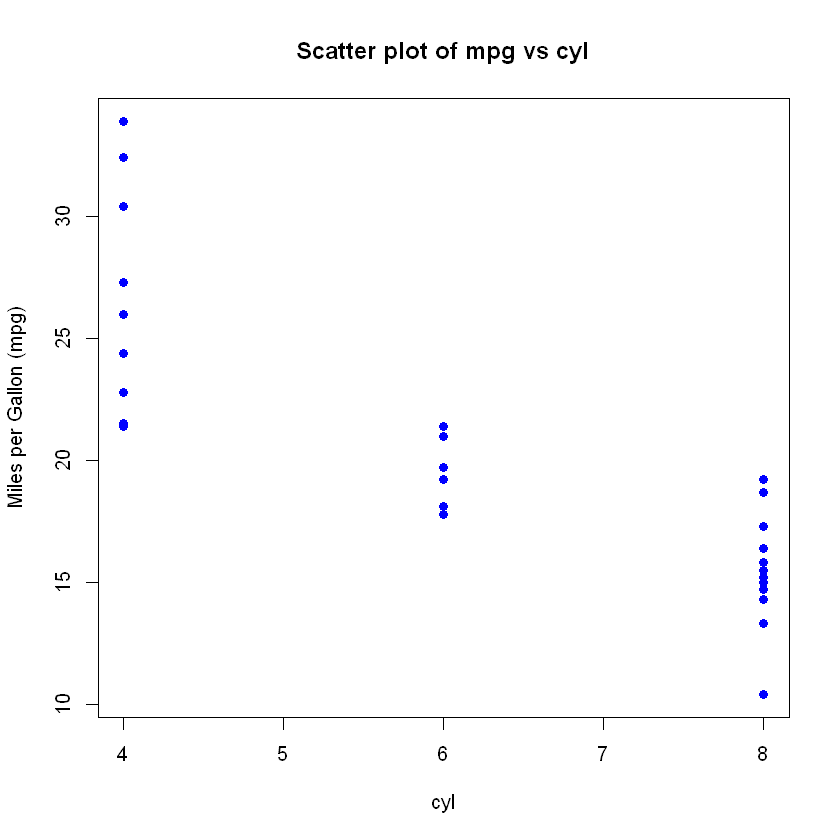

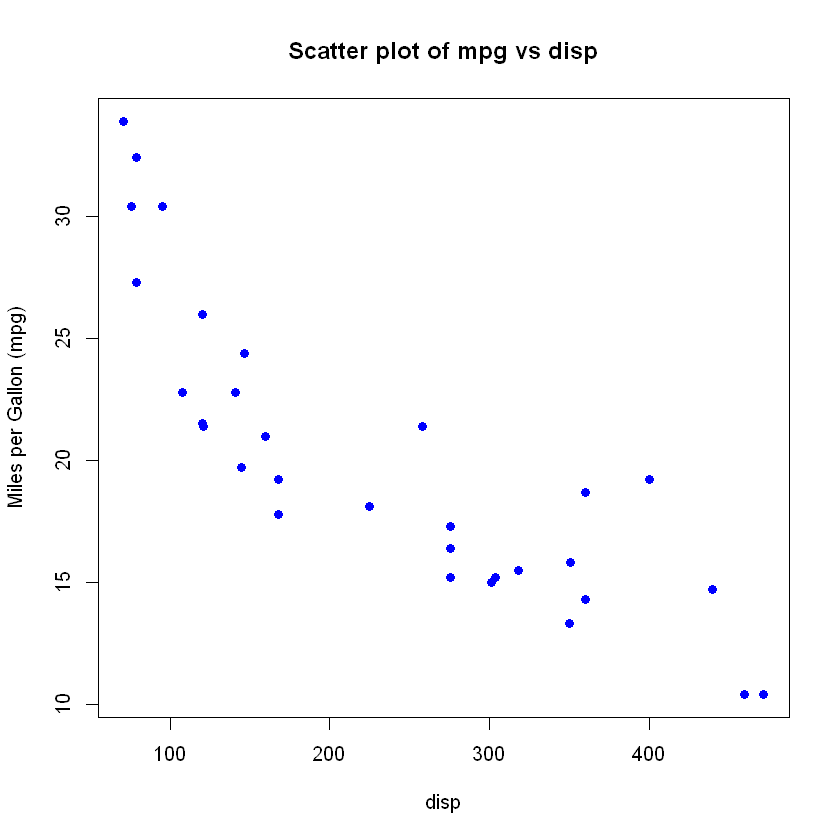

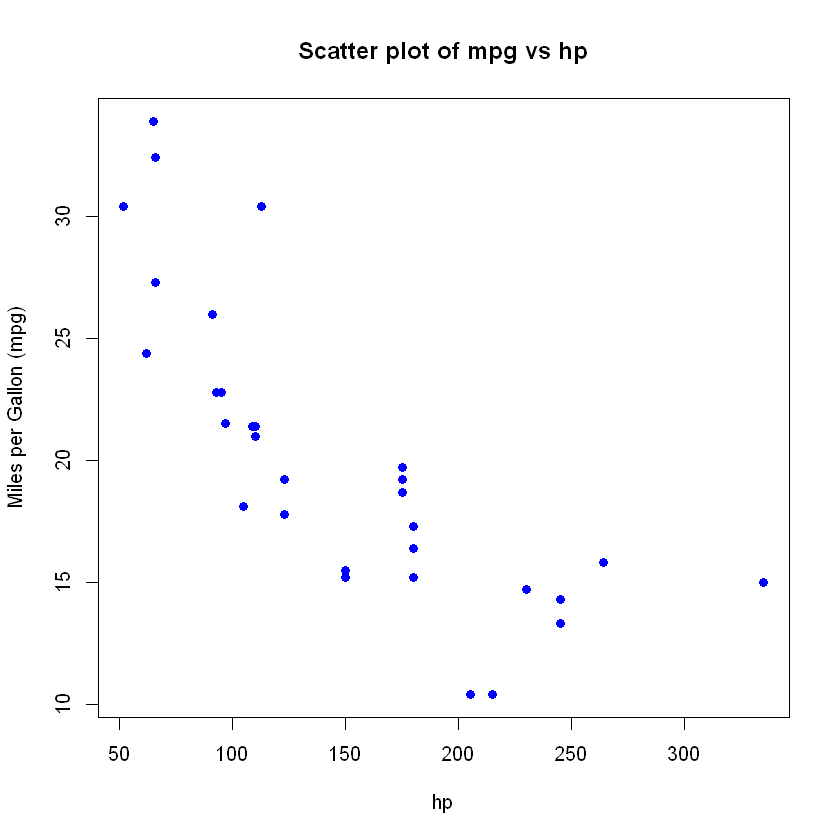

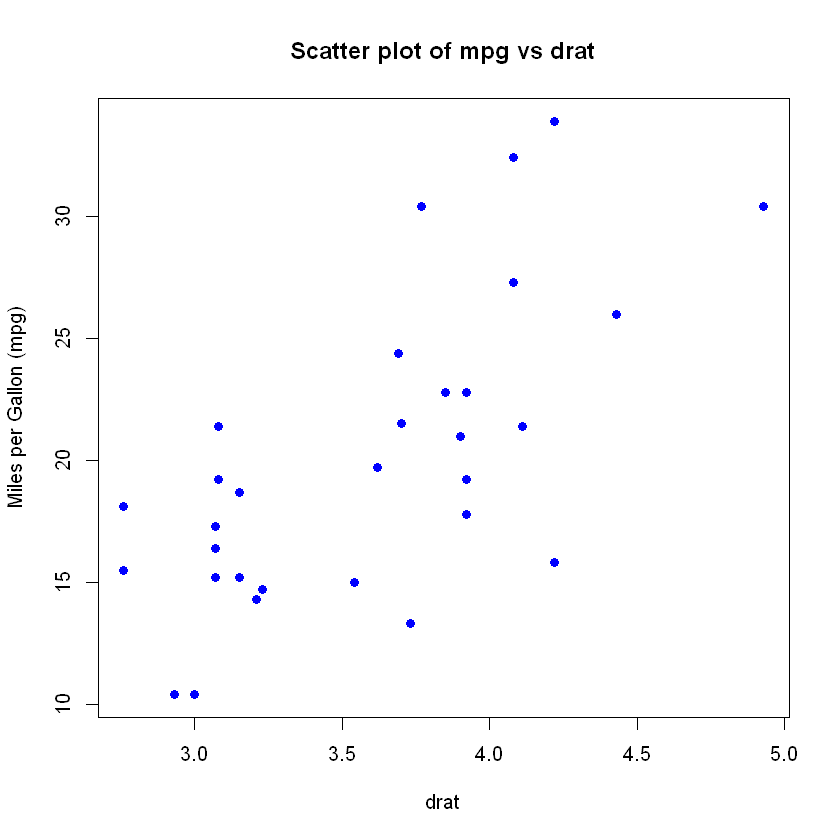

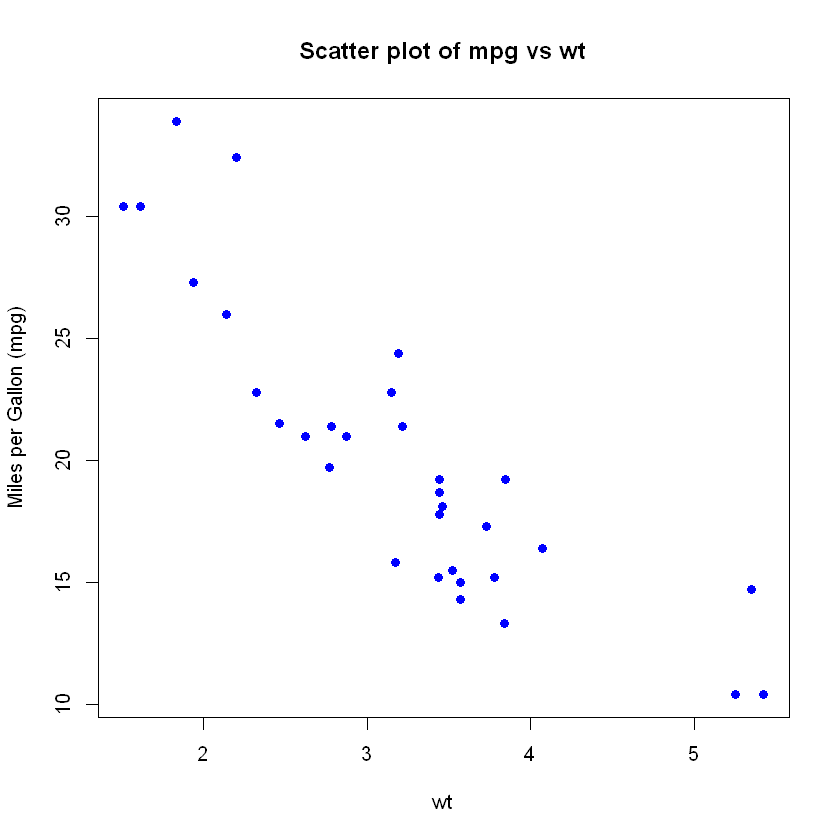

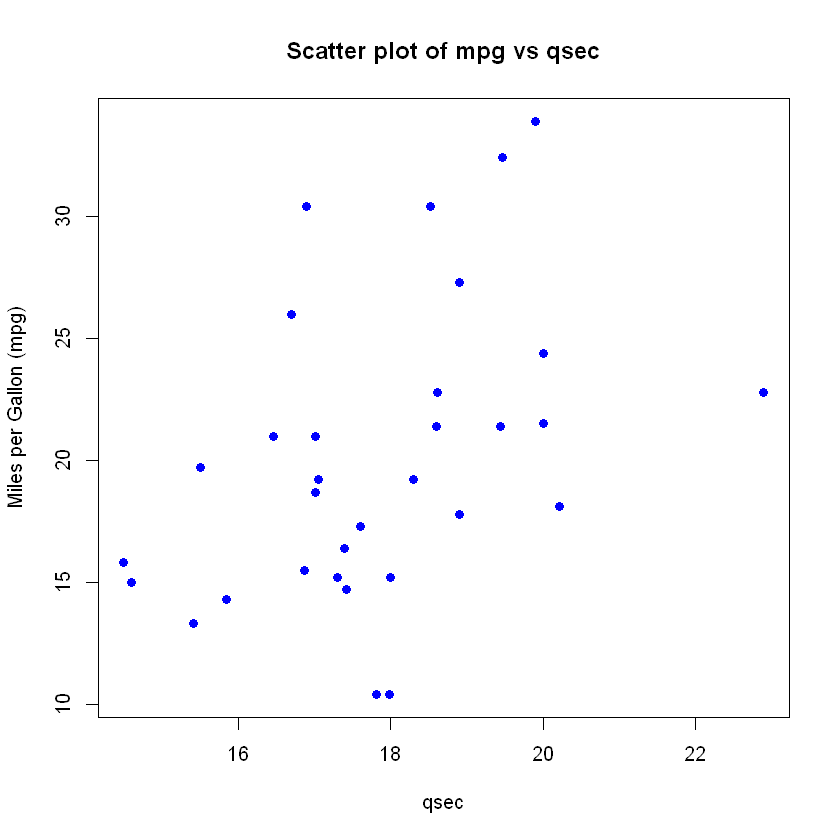

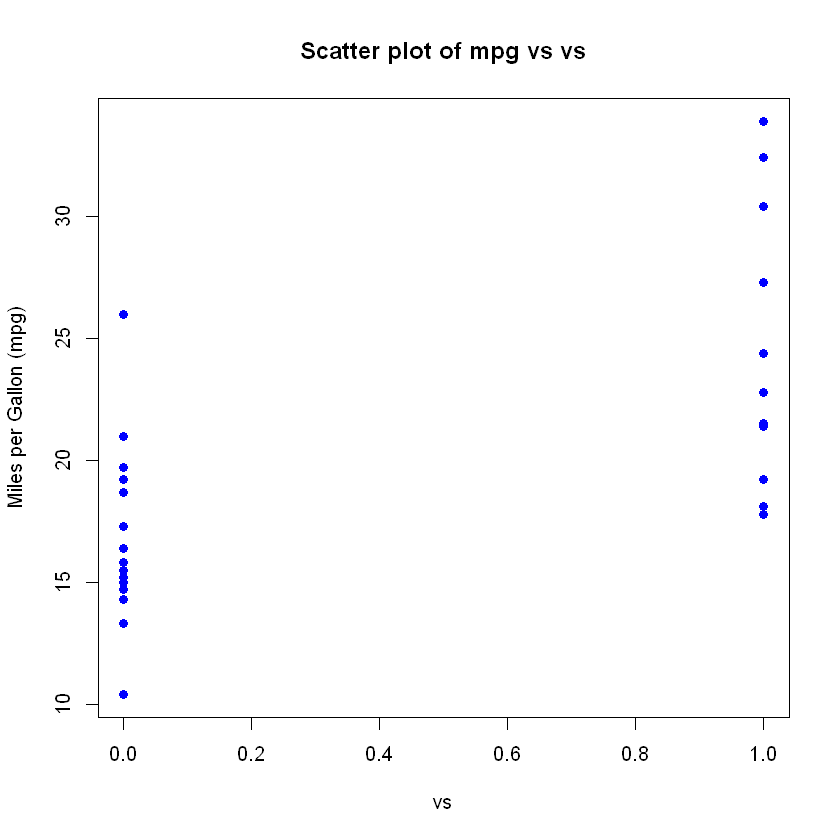

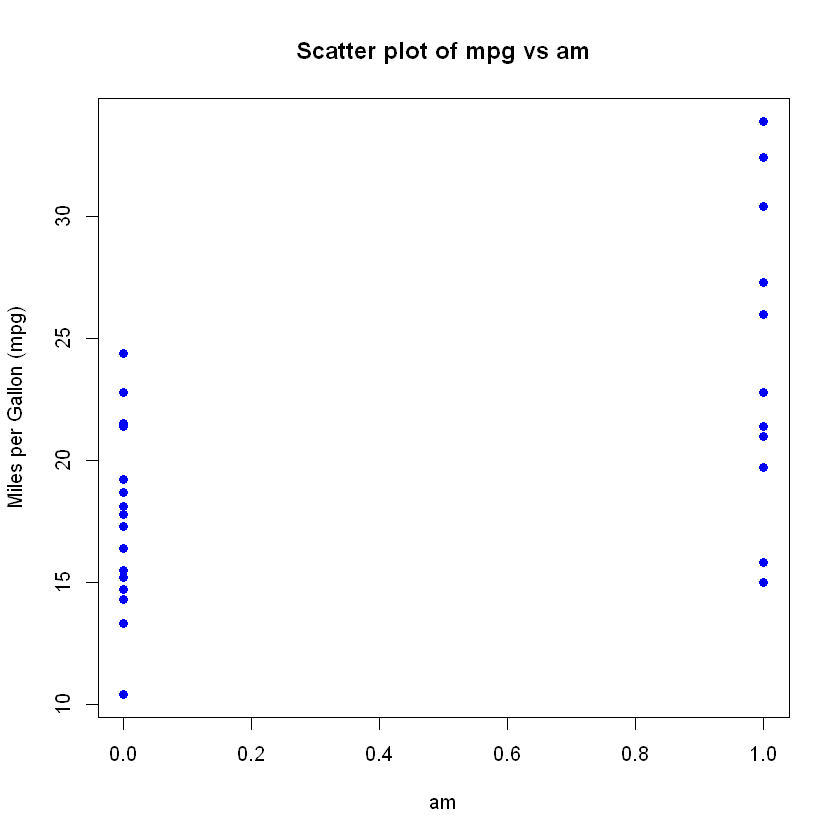

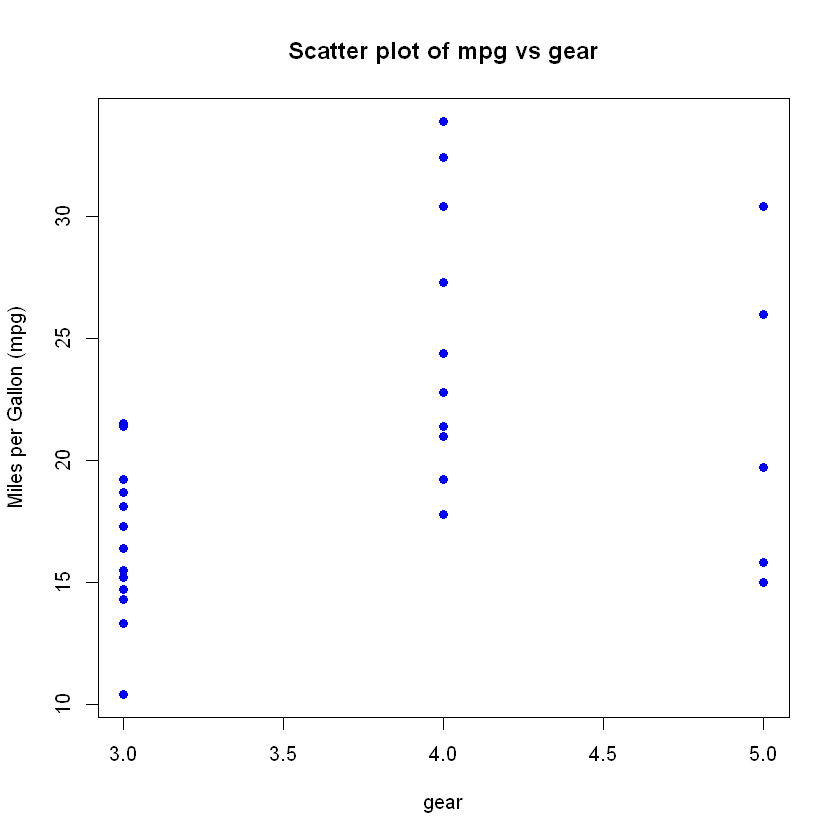

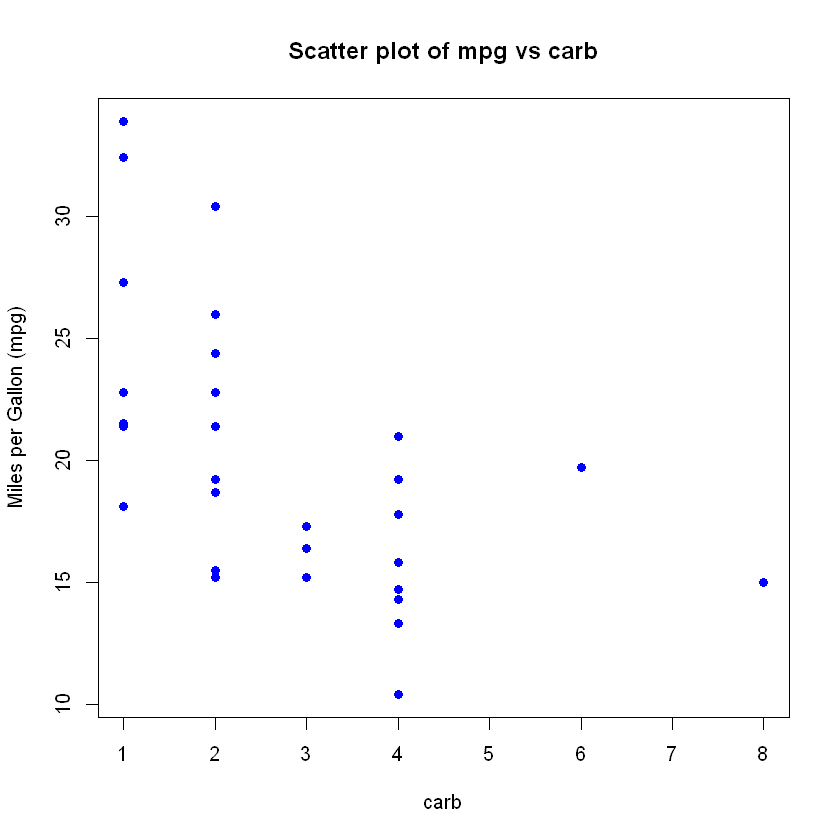

In [8]:
par(bg = "white")

plot_mpg_vs <- function(variable) {
    if (!variable %in% names(mtcars)) {
        stop("Variable not found in the dataset")
    }
    plot(mtcars[[variable]], mtcars$mpg, 
         main = paste("Scatter plot of mpg vs", variable), 
         xlab = variable, 
         ylab = "Miles per Gallon (mpg)", 
         pch = 19, col = "blue", bg = "white")
}

for (variable in names(mtcars)) {
    if (variable != "mpg") {
        plot_mpg_vs(variable)
    }
}

## Perform multiple linear regression

In [9]:
model <- lm(mpg ~ hp + drat + wt, data = mtcars)
summary(model)


Call:
lm(formula = mpg ~ hp + drat + wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3598 -1.8374 -0.5099  0.9681  5.7078 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.394934   6.156303   4.775 5.13e-05 ***
hp          -0.032230   0.008925  -3.611 0.001178 ** 
drat         1.615049   1.226983   1.316 0.198755    
wt          -3.227954   0.796398  -4.053 0.000364 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.561 on 28 degrees of freedom
Multiple R-squared:  0.8369,	Adjusted R-squared:  0.8194 
F-statistic: 47.88 on 3 and 28 DF,  p-value: 3.768e-11


### Interprétation des résultats :

1. **(Intercept) : 29.394934**  
   Cela représente l'ordonnée à l'origine, c'est-à-dire la valeur de `mpg` lorsque toutes les autres variables indépendantes (wt, hp, drat) sont égales à zéro. Bien que cette valeur n'ait pas de sens pratique direct dans ce cas, elle est nécessaire pour établir l'équation de régression.

2. **hp : -0.032230**  
   Pour chaque augmentation d'une unité de la puissance (hp), tout le reste étant constant, la consommation de carburant (`mpg`) diminue de 0.032230 unités. Cette relation est statistiquement significative (p = 0.001178).

3. **drat : 1.615049**  
   Pour chaque augmentation d'une unité du rapport de pont arrière (drat), la consommation de carburant (`mpg`) augmente de 1.615049 unités. Cependant, cela n'est pas statistiquement significatif (p = 0.198755).

4. **wt : -3.227954**  
   Pour chaque unité supplémentaire de poids (wt), la consommation de carburant (`mpg`) diminue de 3.227954 unités, ce qui montre que le poids du véhicule a une influence notable. Cette relation est statistiquement significative (p = 0.000364).

### Signification générale :
- **R² multiple : 0.8369**  
  Cela signifie que 83.69% de la variance dans `mpg` peut être expliquée par ce modèle de régression linéaire multiple.

- **R² ajusté :  0.8194**  
  Après ajustement pour le nombre de prédicteurs, 81.94% de la variance dans `mpg` est expliquée par le modèle.

- **Erreur standard résiduelle : 2.561**  
  L'écart-type des résidus (ou erreurs) est de 2.561, indiquant l'étendue des différences entre les valeurs prédites et les valeurs réelles.

- **F-statistic : 47.88**  
  La statistique de test F est significative (p = 3.768e-11), ce qui signifie que le modèle global est significativement meilleur que de ne pas utiliser de modèle (modèle nul).

### Équation de la régression linéaire multiple :

mpg = 29.394934 - 0.032230*hp + 1.615049*drat - 3.227954*wt


In [10]:
predictions <- predict(model, newdata = mtcars)

In [11]:
predictions

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
          23.691040           22.867911           25.126590           20.446067 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
          17.737855           19.299555           15.158995           23.059005 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
          22.495981           20.657423           20.657423           15.413888 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
          16.511392           16.349995           10.573035            9.802121 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
           9.945134           26.755627           30.467997           28.192167 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
          24.287358           17.655510           18.559755           15.127273 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
          16.317480           27.611035           26.708811           26.957737 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
          17.468998           20.659657           12.791225           23.545958

In [12]:
residus_pred <- mtcars$mpg - predictions

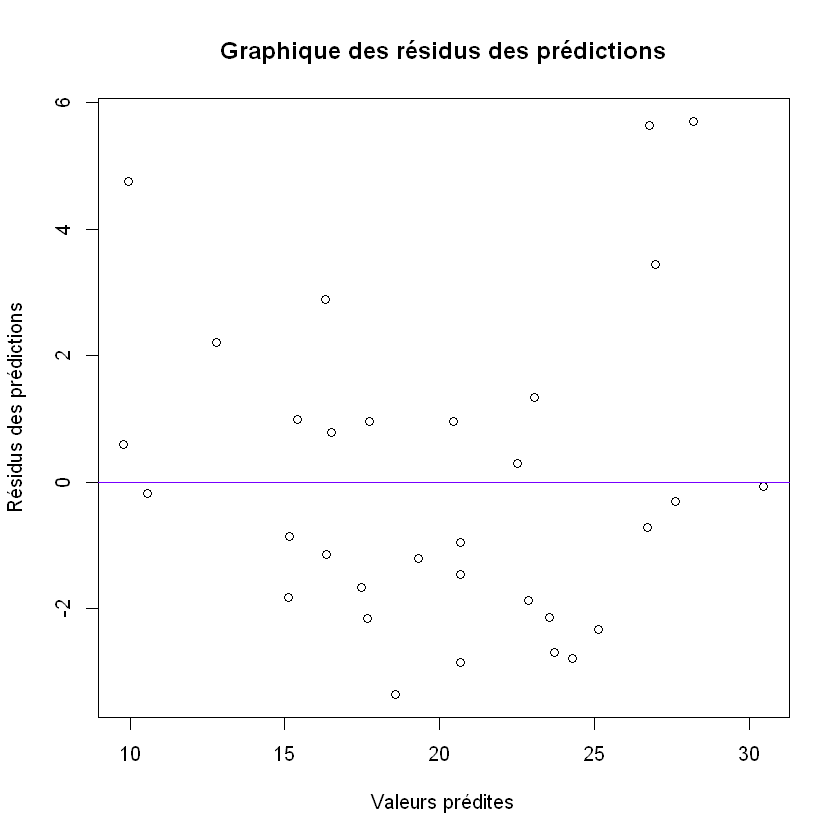

In [13]:
par(bg = "white")

plot(predictions, residus_pred,
     xlab = "Valeurs prédites",
     ylab = "Résidus des prédictions",
     main = "Graphique des résidus des prédictions")
abline(h = 0, col = "#7700ff")


In [14]:
# Create a new data frame with new values
new_data <- data.frame(hp = c(110, 150, 200), drat = c(3.9, 3.85, 3.7), wt = c(2.62, 3.0, 3.5))

# Predict the mpg for the new values
new_predictions <- predict(model, newdata = new_data)

# Display the predictions
new_predictions

1        2        3 
23.69104 21.09445 17.62669